# Plot SWOT fields and spectra AVISO Level 3

In this script we read in the SWOT data from a Pass between specified lats and plot the fields and spectra for the AVISO Level3 SWOT data. We also perform a comparison between Level 2 Version C, D and Level 3 Data

In [1]:
import jws_swot_tools as swot
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


┌ Warning: CHOLMOD version incompatibility
│ 
│ Julia was compiled with CHOLMOD version 4.0.4. It is
│ currently linked with version 5.3.1.
│ This might cause Julia to terminate when working with
│ sparse matrix factorizations, e.g. solving systems of
│ equations with \.
│ 
│ It is recommended that you use Julia with the same major
│ version of CHOLMOD as the one used during the build, or
│ download the generic binaries from www.julialang.org,
│ which ship with the correct versions of all dependencies.
└ @ SparseArrays.CHOLMOD ~/miniconda3/envs/d3/share/julia/stdlib/v1.10/SparseArrays/src/solvers/cholmod.jl:206


### Import SWOT L3 data and files for a pass between specified lats

In [2]:
# Read in the SWOT data for this pass
pass_num = 354
lat_max = 35 
lat_min = 28 

data_folder = f'/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_{str(pass_num).zfill(3)}/'

# 1. Find overlapping cycles
files, shared_cycles, karin_files, nadir_files = swot.return_swot_l3_files(data_folder, pass_num)
print(f"Found {len(shared_cycles)} shared cycles.")

# 2. Get Indices of Karin and Nadir points in lat range
indx, track_len, grid_width, nadir_pts, indx_nad = swot.get_l3_indices(karin_files[0][0], lat_min, lat_max)

# 3. Init the classes as for the level 2 data 
dims_SWOT = [len(shared_cycles), track_len, nadir_pts]
karin3, nadir3 = swot.init_swot_arrays(dims_SWOT, lat_min, lat_max, pass_num)

# 3. Load the data into the KaRIn and Nadir classes
swot.load_l3_data(karin_files, indx, karin3, nadir3, lat_min, lat_max)

# 4. Process
swot.process_l3_karin(karin3)
swot.process_l3_nadir(nadir3)

# 5. Build the coordinate grids 
karin3.coordinates()
nadir3.coordinates()

# 6. Compute the Spectra 
karin3.compute_spectra()
nadir3.compute_spectra()

[('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_001_354_20230802T201436_20230802T210603_v2.0.1.nc', 1, 354), ('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_002_354_20230823T165941_20230823T175108_v2.0.1.nc', 2, 354), ('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_003_354_20230913T134447_20230913T143614_v2.0.1.nc', 3, 354), ('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_004_354_20231004T102949_20231004T112116_v2.0.1.nc', 4, 354), ('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_005_354_20231025T071454_20231025T080621_v2.0.1.nc', 5, 354), ('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_006_354_20231115T035959_20231115T045126_v2.0.1.nc', 6, 354), ('/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_354/SWOT_L3_LR_SSH_Basic_007_354_20231206T004505_

/home/jskinner1/SWOT_tools/src/jws_swot_tools/import_and_process_level3.py:203: RuntimeWarning: Mean of empty slice
  ssh_mean = np.nanmean(ssh_arr, axis=0)


X grid range (km): 0.00 to 275.38 (span: 275.38 km)
Y grid range (km): 0.00 to 797.83 (span: 797.83 km)
Track Length: 797.83 km
Swath Width: 137.69 km
Karin spacing: dx = 1.99 km, dy = 2.01 km
Nadir spacing: dy = 7.49 km
Computing KaRIn spectra...
Computing Nadir spectra...


### Plot the fields and spectra 

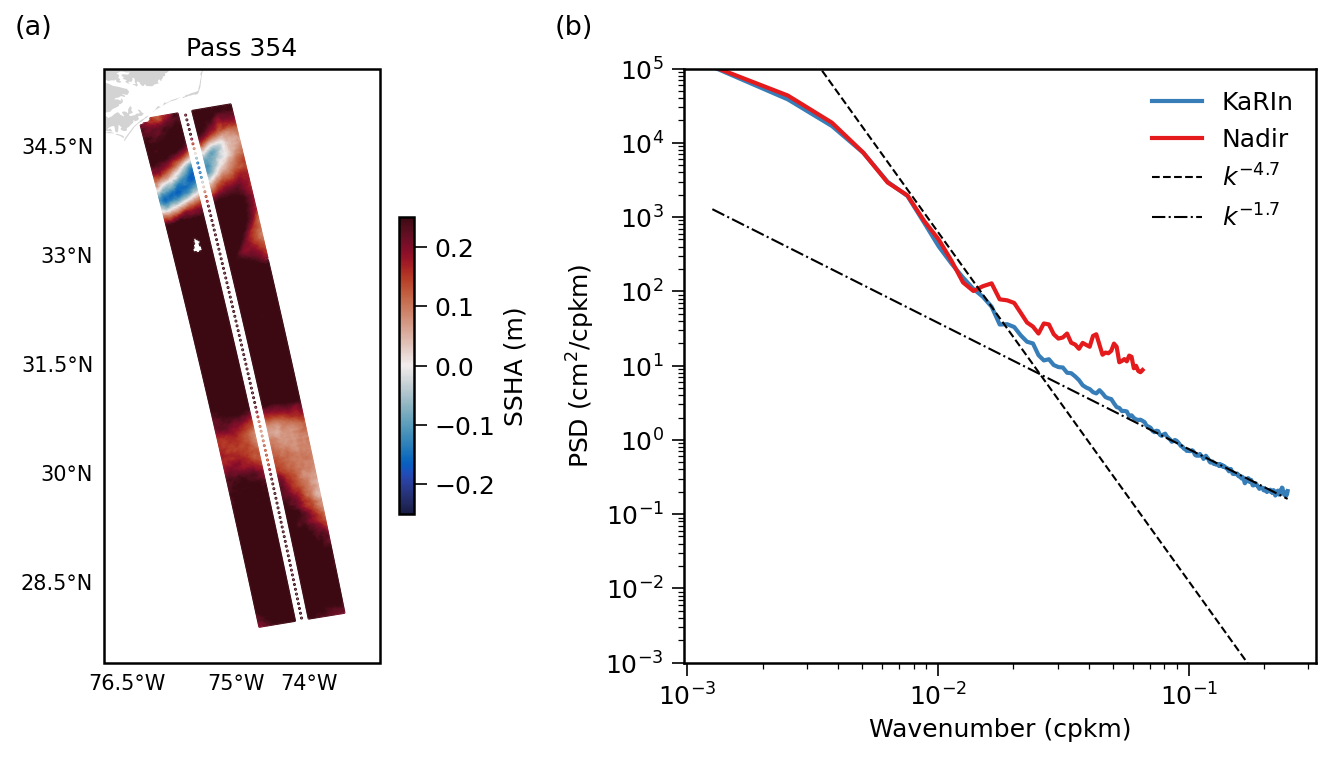

In [21]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy
import cartopy.crs as ccrs
import numpy as np
import cmocean

swot.set_plot_style()

index = 0
vmin, vmax = -0.25, 0.25
ylims = (1e-3, 1e5)
cmap = 'cmo.balance'

fig = plt.figure(figsize=(10, 5), dpi=150)
gs = GridSpec(1, 2, width_ratios=[1, 1.0], figure=fig)

# ───── SWOT Map ─────
# Define padding in degrees
pad = 0.5

lon_min_plot = np.nanmin(karin3.lon[index]) - pad
lon_max_plot = np.nanmax(karin3.lon[index]) + pad
lat_min_plot = np.nanmin(karin3.lat[index]) - pad
lat_max_plot = np.nanmax(karin3.lat[index]) + pad

ax0 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax0.set_extent([lon_min_plot, lon_max_plot, lat_min_plot, lat_max_plot], crs=ccrs.PlateCarree())

sc0 = ax0.scatter(
    karin3.lon[index], karin3.lat[index],
    c=karin3.ssh[index], s=0.2, vmin=vmin, vmax=vmax, cmap=cmap,
    transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True
)
ax0.scatter(
    nadir3.lon[index], nadir3.lat[index],
    c=nadir3.ssh[index], s=0.2, vmin=vmin, vmax=vmax,
    cmap=cmap, transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True
)
#ax0.coastlines()
ax0.add_feature(cartopy.feature.LAND, facecolor='lightgrey', edgecolor='none', zorder=0)
ax0.set_title(f'Pass {pass_num:03d}')
gl0 = ax0.gridlines(draw_labels=True, linewidth=0.5, alpha=0.0)
gl0.top_labels = gl0.right_labels = False
cbar0 = fig.colorbar(sc0, ax=ax0, orientation='vertical', shrink=0.5, pad=0.03)
cbar0.set_label("SSHA (m)")

# ───── Power Spectrum ─────
ax1 = fig.add_subplot(gs[0, 1])

ax1.loglog(karin3.wavenumbers_cpkm,  karin3.spec_ssh, label='KaRIn', linewidth=2.)
ax1.loglog(nadir3.wavenumbers_cpkm,  nadir3.spec_ssh, label='Nadir', linewidth=2.)
#ax1.loglog(karin.wavenumbers * 1e3, karin.spec_ssh, label='SWOT KaRIn SSH', linewidth=2.0)
#ax1.loglog(karin.wavenumbers * 1e3, karin.spec_tmean, label='SWOT Time-mean', linewidth=2.0)
#ax1.loglog(karin.wavenumbers * 1e3, karin.spec_tide, label='SWOT HRET', linewidth=2.0)

# Reference slope lines (k^-5 and k^-2)
k_ref = karin3.wavenumbers_cpkm  # range of wavenumbers (cpkm)
C1 = 2.5e-7  # vertical placement for k^-5
C2 = 1.5e-2  # vertical placement for k^-2
ax1.loglog(k_ref, C1 * k_ref**-4.7, 'k--', linewidth=1, label=r'$k^{-4.7}$')
ax1.loglog(k_ref, C2 * k_ref**-1.7, 'k', linestyle='-.', linewidth=1, label=r'$k^{-1.7}$')

ax1.set_xlabel("Wavenumber (cpkm)")
ax1.set_ylabel("PSD (cm$^2$/cpkm)")
ax1.set_ylim(ylims)
ax1.legend()

# (a) for left panel
fig.text(0.13, 1, "(a)", fontsize=13, 
         va="top", ha="center")

# (b) for right panel
fig.text(0.49, 1, "(b)", fontsize=13, 
         va="top", ha="center")

plt.tight_layout()
fig.savefig("swot_map_spectrum.pdf", bbox_inches='tight')
plt.show()

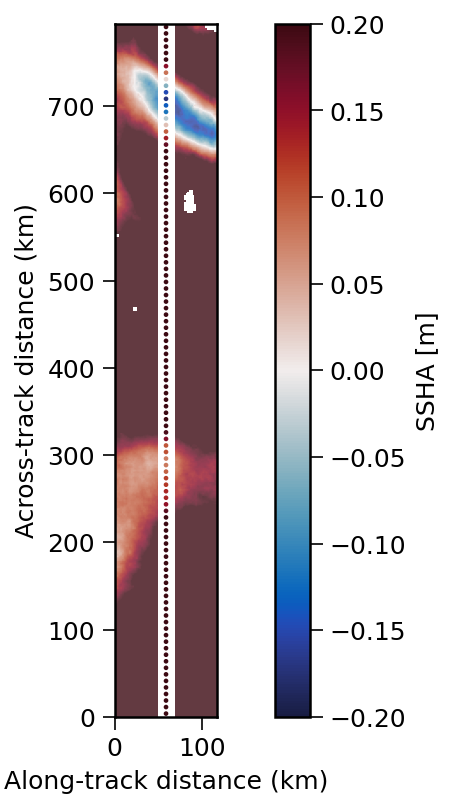

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# Pick an index to test
index = 0

# Mask invalid values
ssh_karin = np.ma.masked_invalid(karin3.ssha[index])
ssh_nadir = np.ma.masked_invalid(nadir3.ssha[index])

# Setup simple grid
nxt, nyt = karin3.ssha.shape[1], karin3.ssha.shape[2]
x_km = np.linspace(0, nyt * karin3.dx * 1e-3, nyt)
y_km = np.linspace(0, nxt * karin3.dy * 1e-3, nxt)
extent = [0, x_km.max(), 0, y_km.max()]

# Plot KaRIn SSH
plt.figure(figsize=(10, 6))
plt.imshow(
    ssh_karin, origin="lower", extent=extent, # this was a bug here 
    cmap="cmo.balance", vmin=-0.2, vmax=0.2, alpha=0.8, rasterized=True
)

# Overlay Nadir SSH points
plt.scatter(
    nadir3.x_grid * 1e-3, nadir3.y_grid * 1e-3,
    c=ssh_nadir, s=5, cmap="cmo.balance", vmin=-0.2, vmax=0.2,
    edgecolor="none", rasterized=True
)

plt.xlabel("Along-track distance (km)")
plt.ylabel("Across-track distance (km)")
plt.colorbar(label="SSHA [m]")
plt.show()

### Fit Spectrum Models to level 3


---- KaRIn spectrum parameters ----
Amp. balanced   :   2.0025e+04 ± 3.72e+02
lambda balanced :   2.7978e+02 ± 3.59e+00
slope balanced  :   4.6868e+00 ± 1.01e-01
Amp. noise      :   6.5329e+01 ± 3.43e+01
lambda noise    :   1.0001e+02 ± 3.22e+01
slope noise     :   1.8356e+00 ± 3.13e-02


---- Nadir spectrum parameters ----
Fitted Nadir noise floor N = 21.202536616598515 ± 1.89e+00



(<Figure size 960x480 with 2 Axes>,
 array([<Axes: title={'center': 'KaRIn'}, xlabel='wavenumber (cpkm)', ylabel='PSD (cm$^2$ / cpkm)'>,
        <Axes: title={'center': 'Nadir'}, xlabel='wavenumber (cpkm)', ylabel='PSD (cm$^2$ / cpkm)'>],
       dtype=object))

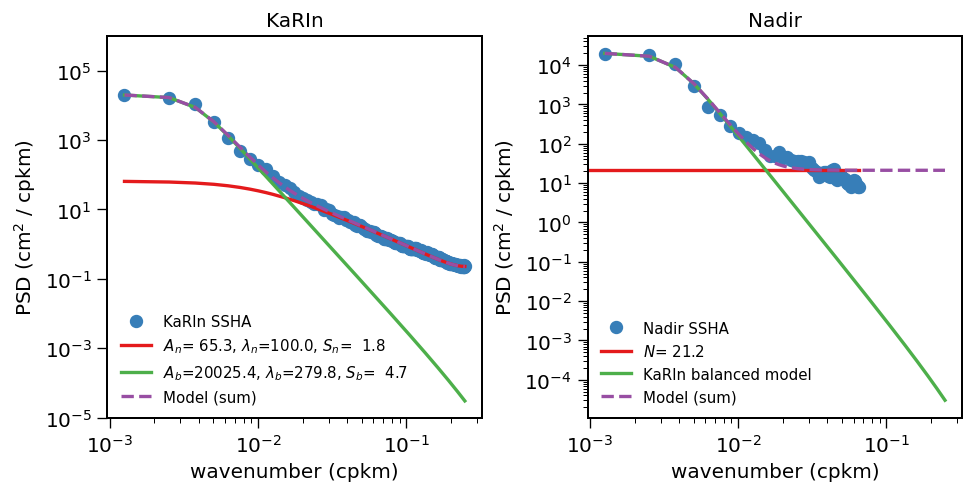

In [18]:
# KaRIn model fit
poptcwg_karin3, pcovcwg_karin3 = swot.fit_spectrum(karin3, karin3.spec_alongtrack_av, swot.karin_model)

# Nadir model fit
poptcwg_nadir3, covcwg_nadir3 = swot.fit_nadir_spectrum(nadir3, nadir3.spec_alongtrack_av, poptcwg_karin3)

# Plot the fits
swot.plot_spectral_fits(karin3, nadir3, poptcwg_karin3, poptcwg_nadir3, 'balanced_fits.pdf')

### Now import the Level 2 Data for Comparison

In [17]:
data_folder = '/expanse/lustre/projects/cit197/jskinner1/SWOT/SCIENCE/' # version C data folder

# finds overlapping cycles between the karin and nadir datasets
_, _, shared_cycles, karin_files, nadir_files = swot.return_swot_files(data_folder, pass_num) 

sample_index = 2 # this is an index we use to import a preliminary file and get track indices 
indx, track_length = swot.get_karin_track_indices(karin_files[sample_index][0], lat_min, lat_max)
indxs, track_length_nadir = swot.get_nadir_track_indices(nadir_files[sample_index][0], lat_min, lat_max)
dims_SWOT = [len(shared_cycles), track_length, track_length_nadir]

karin2C, nadir2C = swot.init_swot_arrays(dims_SWOT, lat_min, lat_max, pass_num)

# read and process the karin data
swot.load_karin_data(karin_files, lat_min, lat_max, karin2C, verbose=False)
swot.process_karin_data(karin2C)

# read and process the nadir data
swot.load_nadir_data(nadir_files, lat_min, lat_max, nadir2C)
swot.process_nadir_data(nadir2C)

# generate the coordinates
karin2C.coordinates()
nadir2C.coordinates()

# Compute spectra
karin2C.compute_spectra()
nadir2C.compute_spectra()

Shared Cycles: [1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


/home/jskinner1/SWOT_tools/src/jws_swot_tools/import_and_process.py:289: RuntimeWarning: Degrees of freedom <= 0 for slice.
  varts = np.nanvar(ssha_array, axis=(1, 2))


Overall SSH variance (overall_var): 0.022878696336389826
----------------------------------
Total Number of Good KaRIn strips : 50
Number of Quality Masked KaRIn strips : 30
Number of High Variance strips removed : 0
Number of Good Cycles: 25
Number of Cycles dropped (>20% masked): 1
----------------------------------

Number of good nadir cycles: 26
Number of bad nadir cycles: 0
X grid range (km): 0.00 to 275.38 (span: 275.38 km)
Y grid range (km): 0.00 to 797.83 (span: 797.83 km)
Track Length: 797.83 km
Swath Width: 137.69 km
Karin spacing: dx = 1.99 km, dy = 2.01 km
Nadir spacing: dy = 7.09 km
Computing KaRIn spectra...
Computing Nadir spectra...


In [18]:
# Do same for version D so we can compare the spectra 
data_folder = '/expanse/lustre/projects/cit197/jskinner1/SWOT/SCIENCE_VD/'

# import and process version D
sample_index = 2
_, _, shared_cycles, karin_files_vd, nadir_files_vd = swot.return_swot_files(data_folder, pass_num) 
indx, track_length = swot.get_karin_track_indices(karin_files_vd[sample_index][0], lat_min, lat_max)
indxs, track_length_nadir = swot.get_nadir_track_indices(nadir_files_vd[sample_index][0], lat_min, lat_max)
dims_SWOT = [len(shared_cycles), track_length, track_length_nadir]
karin2D, nadir2D = swot.init_swot_arrays(dims_SWOT, lat_min, lat_max, pass_num)

swot.load_karin_data(karin_files_vd, lat_min, lat_max, karin2D, verbose=False)
swot.process_karin_data(karin2D)

swot.load_nadir_data(nadir_files_vd, lat_min, lat_max, nadir2D)
swot.process_nadir_data(nadir2D)

# generate the coordinates
karin2D.coordinates()
nadir2D.coordinates()

# Compute spectra
karin2D.compute_spectra()
nadir2D.compute_spectra()

Shared Cycles: [1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 34, 35, 36, 37, 38, 39, 40]


/home/jskinner1/SWOT_tools/src/jws_swot_tools/import_and_process.py:289: RuntimeWarning: Degrees of freedom <= 0 for slice.
  varts = np.nanvar(ssha_array, axis=(1, 2))


Overall SSH variance (overall_var): 0.014691024553445911
----------------------------------
Total Number of Good KaRIn strips : 62
Number of Quality Masked KaRIn strips : 41
Number of High Variance strips removed : 0
Number of Good Cycles: 31
Number of Cycles dropped (>20% masked): 3
----------------------------------

Number of good nadir cycles: 34
Number of bad nadir cycles: 0
X grid range (km): 0.00 to 275.38 (span: 275.38 km)
Y grid range (km): 0.00 to 797.83 (span: 797.83 km)
Track Length: 797.83 km
Swath Width: 137.69 km
Karin spacing: dx = 1.99 km, dy = 2.01 km
Nadir spacing: dy = 7.09 km
Computing KaRIn spectra...
Computing Nadir spectra...


In [19]:
# Finally, we want the level3 filtered as well for the comparison 
data_folder = f'/expanse/lustre/projects/cit197/jskinner1/SWOT/LEVEL_3/pass_{str(pass_num).zfill(3)}/'
files, shared_cycles, karin_files, nadir_files = swot.return_swot_l3_files(data_folder, pass_num)
print(f"Found {len(shared_cycles)} shared cycles.")
indx, track_len, grid_width, nadir_pts, indx_nad = swot.get_l3_indices(karin_files[0][0], lat_min, lat_max)
dims_SWOT = [len(shared_cycles), track_len, nadir_pts]

karin3F, nadir3F = swot.init_swot_arrays(dims_SWOT, lat_min, lat_max, pass_num)
swot.load_l3_data(karin_files, indx, karin3F, nadir3F, lat_min, lat_max, ssh_key='ssha_filtered')

# Process
swot.process_l3_karin(karin3F)
swot.process_l3_nadir(nadir3F)

# Build the coordinate grids 
karin3F.coordinates()
nadir3F.coordinates()

# Compute the Spectra 
karin3F.compute_spectra()
nadir3F.compute_spectra()

L3 Shared Cycles: [1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Found 39 shared cycles.
KaRIn Rows: 395
Valid Nadir Points: 106


/home/jskinner1/SWOT_tools/src/jws_swot_tools/import_and_process_level3.py:192: RuntimeWarning: Mean of empty slice
  ssh_mean = np.nanmean(ssh_arr, axis=0)


X grid range (km): 0.00 to 275.38 (span: 275.38 km)
Y grid range (km): 0.00 to 797.83 (span: 797.83 km)
Track Length: 797.83 km
Swath Width: 137.69 km
Karin spacing: dx = 1.99 km, dy = 2.01 km
Nadir spacing: dy = 7.50 km
Computing KaRIn spectra...
Computing Nadir spectra...


### Compare the Level 2 and Level 3 fields and spectra

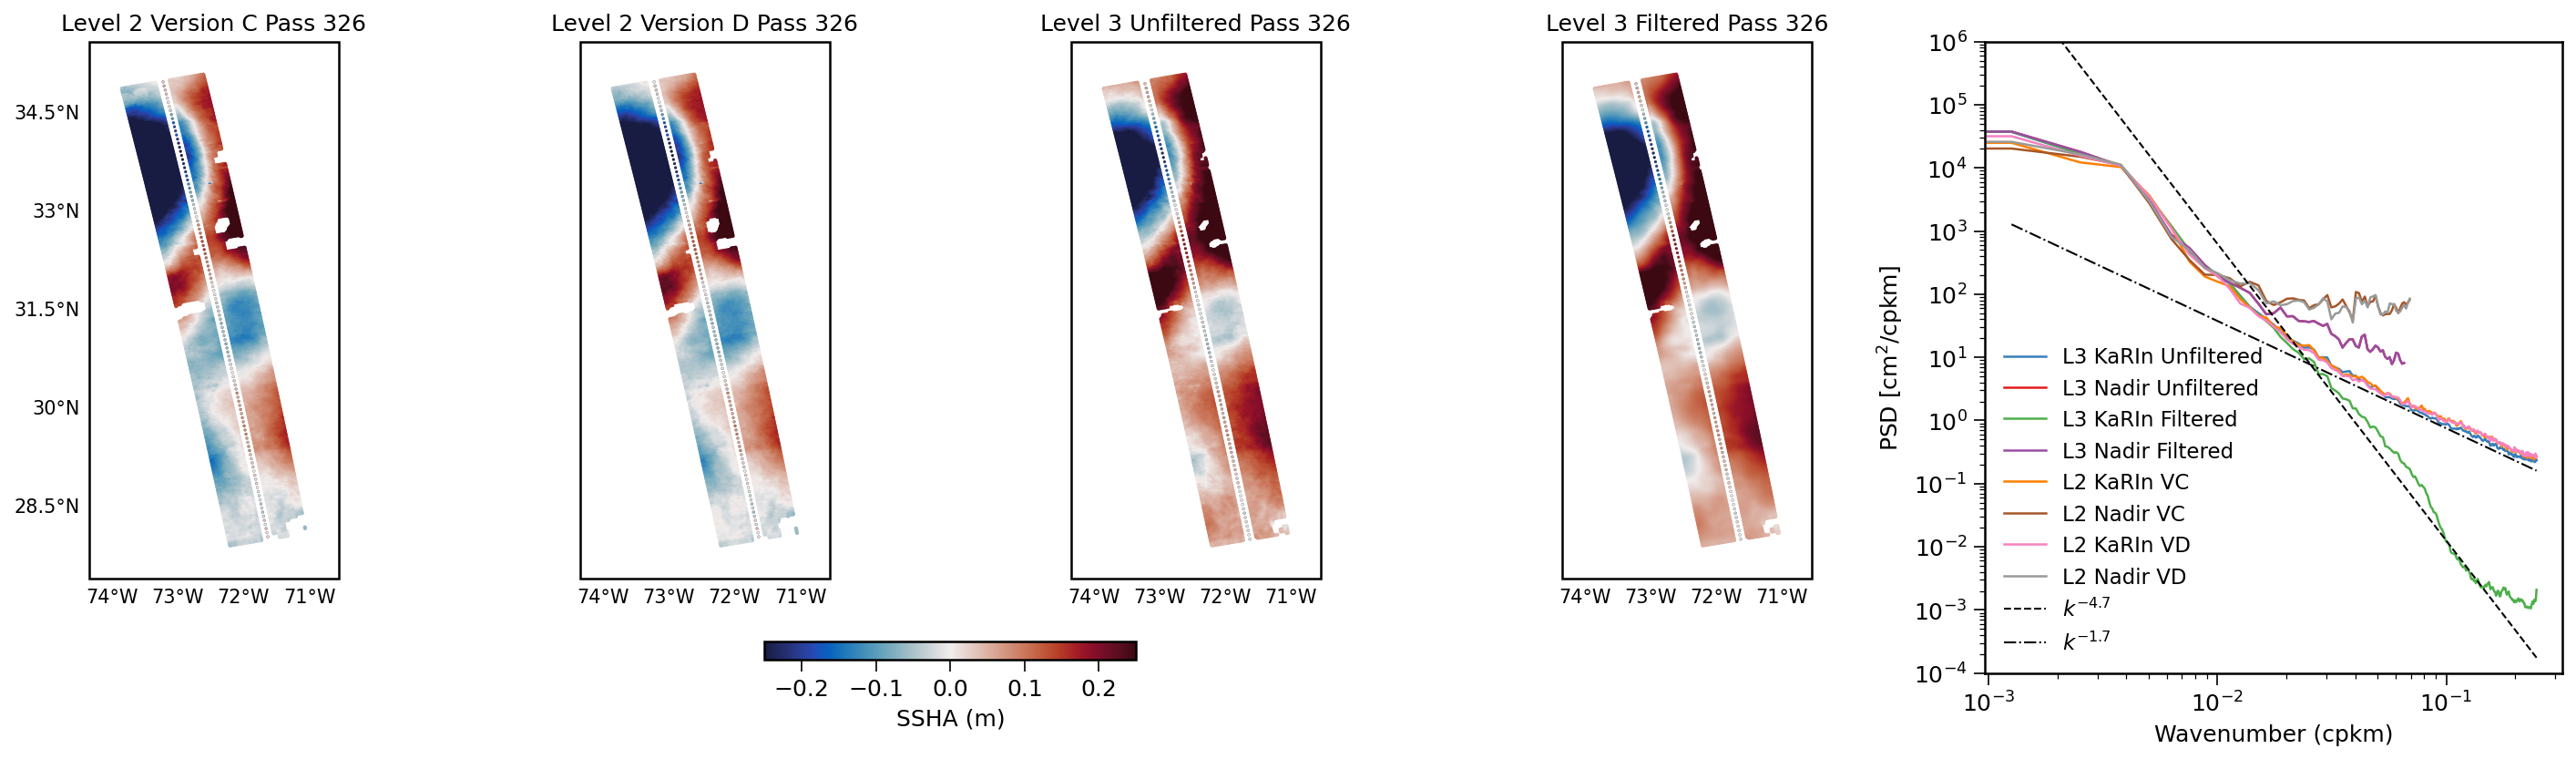

In [23]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

swot.set_plot_style()

index = 0
vmin, vmax = -0.25, 0.25
ylims = (1e-4, 1e6)
cmap = 'cmo.balance'

fig = plt.figure(figsize=(24, 6), dpi=150)
gs = GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1.5], figure=fig, wspace=0.25)

pad = 0.5

# --- Panel 1: Level 2 Version C ---
ax0 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax0.set_extent([lon_min_plot, lon_max_plot, lat_min_plot, lat_max_plot], crs=ccrs.PlateCarree())

sc0 = ax0.scatter(
    karin2C.lon[index], karin2C.lat[index],
    c=karin2C.ssha[index], s=1, vmin=vmin, vmax=vmax, cmap=cmap,
    transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True
)
ax0.scatter(
    nadir2C.lon[index], nadir2C.lat[index],
    c=nadir2C.ssha[index], s=2, vmin=vmin, vmax=vmax,
    cmap=cmap, transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True, edgecolors='k', linewidths=0.1
)

ax0.add_feature(cfeature.LAND, facecolor='lightgrey', edgecolor='none', zorder=0)
ax0.set_title(f'Level 2 Version C Pass {pass_num:03d}')
gl0 = ax0.gridlines(draw_labels=True, linewidth=0.5, alpha=0.0)
gl0.top_labels = gl0.right_labels = False


# --- Panel 2: Level 2 Version D ---
ax1 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
ax1.set_extent([lon_min_plot, lon_max_plot, lat_min_plot, lat_max_plot], crs=ccrs.PlateCarree())

ax1.scatter(
    karin2D.lon[index], karin2D.lat[index],
    c=karin2D.ssha[index], s=1, vmin=vmin, vmax=vmax, cmap=cmap,
    transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True
)
ax1.scatter(
    nadir2D.lon[index], nadir2D.lat[index],
    c=nadir2D.ssha[index], s=2, vmin=vmin, vmax=vmax,
    cmap=cmap, transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True, edgecolors='k', linewidths=0.1
)

ax1.add_feature(cfeature.LAND, facecolor='lightgrey', edgecolor='none', zorder=0)
ax1.set_title(f'Level 2 Version D Pass {pass_num:03d}')
gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.0)
gl1.top_labels = gl1.right_labels = gl1.left_labels = False


# --- Panel 3: Level 3 Unfiltered ---
ax2 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
ax2.set_extent([lon_min_plot, lon_max_plot, lat_min_plot, lat_max_plot], crs=ccrs.PlateCarree())

ax2.scatter(
    karin3.lon[index], karin3.lat[index],
    c=karin3.ssha[index], s=1, vmin=vmin, vmax=vmax, cmap=cmap,
    transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True
)
ax2.scatter(
    nadir3.lon[index], nadir3.lat[index],
    c=nadir3.ssha[index], s=2, vmin=vmin, vmax=vmax,
    cmap=cmap, transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True, edgecolors='k', linewidths=0.1
)

ax2.add_feature(cfeature.LAND, facecolor='lightgrey', edgecolor='none', zorder=0)
ax2.set_title(f'Level 3 Unfiltered Pass {pass_num:03d}')
gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.0)
gl2.top_labels = gl2.right_labels = gl2.left_labels = False


# --- Panel 4: Level 3 Filtered ---
ax3 = fig.add_subplot(gs[0, 3], projection=ccrs.PlateCarree())
ax3.set_extent([lon_min_plot, lon_max_plot, lat_min_plot, lat_max_plot], crs=ccrs.PlateCarree())

ax3.scatter(
    karin3F.lon[index], karin3F.lat[index],
    c=karin3F.ssha[index], s=1, vmin=vmin, vmax=vmax, cmap=cmap,
    transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True
)
ax3.scatter(
    nadir3F.lon[index], nadir3F.lat[index],
    c=nadir3F.ssha[index], s=2, vmin=vmin, vmax=vmax,
    cmap=cmap, transform=ccrs.PlateCarree(), marker='o', 
    rasterized=True, edgecolors='k', linewidths=0.1
)

ax3.add_feature(cfeature.LAND, facecolor='lightgrey', edgecolor='none', zorder=0)
ax3.set_title(f'Level 3 Filtered Pass {pass_num:03d}')
gl3 = ax3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.0)
gl3.top_labels = gl3.right_labels = gl3.left_labels = False

# Shared colorbar
cbar = fig.colorbar(sc0, ax=[ax0, ax1, ax2, ax3], orientation='horizontal', fraction=0.05, pad=0.1, shrink=0.2)
cbar.set_label("SSHA (m)")


# --- Panel 5: Spectra ---
ax4 = fig.add_subplot(gs[0, 4])
ax4.loglog(karin3.wavenumbers_cpkm, karin3.spec_ssh, label='L3 KaRIn Unfiltered', linewidth=1.2)
ax4.loglog(nadir3.wavenumbers_cpkm, nadir3.spec_ssh, label='L3 Nadir Unfiltered', linewidth=1.2)

ax4.loglog(karin3F.wavenumbers_cpkm, karin3F.spec_ssh, label='L3 KaRIn Filtered', linewidth=1.2)
ax4.loglog(nadir3F.wavenumbers_cpkm, nadir3F.spec_ssh, label='L3 Nadir Filtered', linewidth=1.2)

ax4.loglog(karin2C.wavenumbers_cpkm, karin2C.spec_ssha, label='L2 KaRIn VC', linewidth=1.2, linestyle='-')
ax4.loglog(nadir2C.wavenumbers_cpkm, nadir2C.spec_ssha, label='L2 Nadir VC', linewidth=1.2, linestyle='-')

ax4.loglog(karin2D.wavenumbers_cpkm, karin2D.spec_ssha, label='L2 KaRIn VD', linewidth=1.2, linestyle='-')
ax4.loglog(nadir2D.wavenumbers_cpkm, nadir2D.spec_ssha, label='L2 Nadir VD', linewidth=1.2, linestyle='-')

k_ref = karin3.wavenumbers_cpkm
C1 = 2.5e-7
C2 = 1.5e-2
ax4.loglog(k_ref, C1 * k_ref**-4.7, 'k--', linewidth=1, label=r'$k^{-4.7}$')
ax4.loglog(k_ref, C2 * k_ref**-1.7, 'k', linestyle='-.', linewidth=1, label=r'$k^{-1.7}$')

ax4.set_xlabel("Wavenumber (cpkm)")
ax4.set_ylabel("PSD [cm$^2$/cpkm]")
ax4.set_ylim(ylims)
ax4.legend(fontsize=11)

fig.savefig("swot_map_spectrum_combined_vC_vD_L3_Unfilt_Filt.pdf", bbox_inches='tight')
plt.show()

### Compare spectrum models

In [ ]:
# KaRIn model fit
poptcwg_karin, pcovcwg_karin = swot.fit_spectrum(karin, karin.spec_alongtrack_av, swot.karin_model)

# Nadir model fit
poptcwg_nadir, covcwg_nadir = swot.fit_nadir_spectrum(nadir, nadir.spec_alongtrack_av, poptcwg_karin)

# Plot the fits
swot.plot_spectral_fits(karin3, nadir3, poptcwg_karin3, poptcwg_nadir3, 'balanced_fits.pdf') # level 3
swot.plot_spectral_fits(karin, nadir, poptcwg_karin, poptcwg_nadir, 'balanced_fits.pdf') # level 2